# Lenet : CNN 아키텍쳐

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
from torchvision.transforms.transforms import ToTensor
# 데이터 전처리
data_transform = transforms.Compose(

    [
    transforms.ToTensor(),
    transforms.Resize(32),
    transforms.Normalize((0.5,),(1.0,))

    ]
)

train_data = datasets.MNIST(root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_lenet/',download=True,train=True,transform=data_transform)
test_data = datasets.MNIST(root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_lenet/',download=True,train=False,transform=data_transform)


In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_lenet/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
               Normalize(mean=(0.5,), std=(1.0,))
           )

In [ ]:
train_data.data[0].size()

torch.Size([28, 28])

In [ ]:
test_data.data[0].size()

torch.Size([28, 28])

In [ ]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [ ]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32)

In [ ]:
data,label = next(iter(train_loader))
data,label

(tensor([[[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           ...,
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],
 
 
         [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           ...,
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
           [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],
 
 
         [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
       

In [ ]:
data.size()

torch.Size([32, 1, 32, 32])

# 모델 생성

In [ ]:
# Lenet : conv layer 3개 , Fully Connected 2개
# https://bskyvision.com/entry/CNN-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EB%93%A4-LeNet-5%EC%9D%98-%EA%B5%AC%EC%A1%B0

class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()

    # 갯수를 계산해서 맞추어 주어야함
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1)
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
    self.conv3 = nn.Conv2d(in_channels=16,out_channels=120,kernel_size=5,stride=1)
    self.fc1 = nn.Linear(in_features=120,out_features=84)
    self.fc2 = nn.Linear(in_features=84,out_features=10)

  def forward(self,x):

    # 신경망 통과
    x = self.conv1(x)
    # nn.ReLU 들은 nn 객체로 만들어 사용
    # F. 는 바로 사용
    x = F.tanh(x)
    x = F.max_pool2d(x,2,2)

    x = self.conv2(x)
    x = F.tanh(x)
    x = F.max_pool2d(x,2,2)

    x = self.conv3(x)
    x = F.tanh(x)
    # 마지막에 펼침
    x = x.view(-1,120)

    x = self.fc1(x)
    x = F.tanh(x)
    x = self.fc2(x)
    x = F.tanh(x)

    return x

In [ ]:
model = Net()
model

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

# 예측

In [ ]:
# tf 와 torch 형식 다름
# torch : 배치,채널,가로,세로

image = torch.randn((1,1,32,32))
# output으로 10개가 나와야함
# 클래스를 10개로 만들었기 때문
model(image)

tensor([[ 0.0447,  0.0769,  0.1137,  0.0637,  0.1099,  0.1476, -0.0110,  0.0449,
          0.0876,  0.1931]], grad_fn=<TanhBackward0>)

# 차원을 추가하면 맞추어줌

In [ ]:
X_train , y_train = train_data.data, train_data.targets
X_test , y_test = test_data.data, test_data.targets

X_train.shape , y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [ ]:
# 1번째 인덱스에 차원(채널값) 추가
# 차원만 추가
X_train = X_train.unsqueeze(1)
X_train.shape

torch.Size([60000, 1, 28, 28])

In [ ]:
X_test = X_test.unsqueeze(1)
X_test.shape

torch.Size([10000, 1, 28, 28])

# 채널,width,height이기때문에 출력안됌

TypeError: ignored

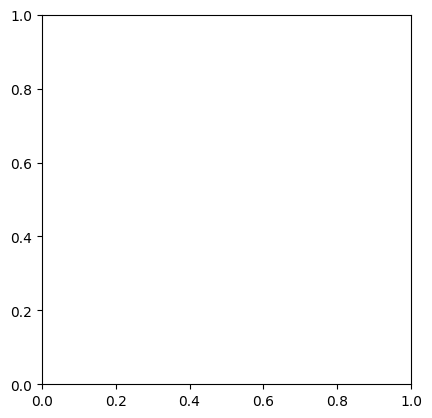

In [ ]:
import matplotlib.pyplot as plt

def show(img):
  temp_img = img.numpy()
  plt.imshow(temp_img)

show(X_train[0])

# np.transpose : 채널,w,h ==> w,h,채널 로 변환

tensor(5)


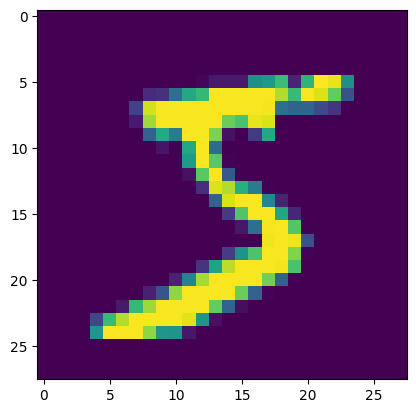

In [ ]:
import matplotlib.pyplot as plt

def show(img):
  temp_img = img.numpy()
  # 순서를 바꿔라
  temp_img_tr = temp_img.transpose((1,2,0))
  plt.imshow(temp_img_tr)
  print(y_train[0])

show(X_train[0])

In [ ]:
X_train[0].shape

torch.Size([1, 28, 28])

In [ ]:
X_train[0]

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
           18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

# make_grid : 이미지 여러개

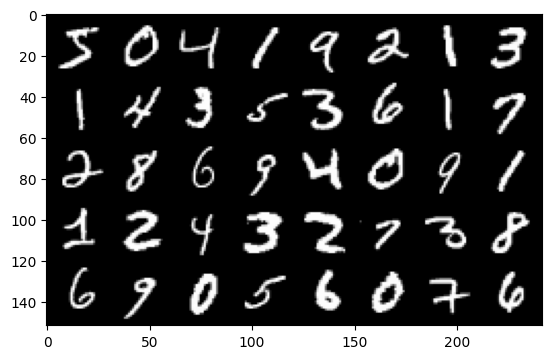

In [ ]:
import matplotlib.pyplot as plt
from torchvision import utils

def show(img):
  temp_img = img.numpy()
  # 순서를 바꿔라
  temp_img_tr = temp_img.transpose((1,2,0))
  plt.imshow(temp_img_tr)

# 8열
image_grid = utils.make_grid(X_train[:40],nrow=8,padding=2)
show(image_grid)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

from torchsummary import summary

# (배치) 빼고
summary(model,input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Conv2d-3            [-1, 120, 1, 1]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


# 모델 실행

In [ ]:
optim = Adam(model.parameters(),lr=1e-3)

for epoch in range(10):
  for data,label in train_loader:
    optim.zero_grad()
    pred = model(data.to(device))
    loss = nn.CrossEntropyLoss()(pred,label.to(device))
    loss.backward()
    optim.step()
  print(f'{epoch+1} loss : {loss.item()}')

1 loss : 0.8682554364204407
2 loss : 0.8476906418800354
3 loss : 0.8255476951599121
4 loss : 0.7995665669441223
5 loss : 0.7973092198371887
6 loss : 0.811711847782135
7 loss : 0.7968054413795471
8 loss : 0.7967295050621033
9 loss : 0.8091915845870972
10 loss : 0.8057490587234497


# 성능 점검

In [ ]:
# 검증 모드
model.eval()

with torch.no_grad():
  total_corr = 0

  for images,labels in test_loader:
    print("images shape : ",images.size())
    images = images.to(device)
    labels = labels.to(device)

    preds = model(images)
    print("preds : ",preds)

    # _ : 큰값
    # pred : 인덱스
    _,pred = torch.max(preds.data,1)

    print("pred : ",pred)
    # eq() 써도됌, eq()이 일반적
    total_corr += (pred == labels).sum()

  print(f'Acc {total_corr/len(test_data)}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
         -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  1.0000,
         -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000,
          1.0000, -1.0000]])
pred :  tensor([7, 6, 8, 2, 9, 4, 3, 1, 9, 0, 9, 3, 6, 8, 7, 0, 1, 0, 5, 8, 2, 7, 7, 0,
        1, 2, 3, 4, 5, 6, 7, 8])
images shape :  torch.Size([32, 1, 32, 32])
preds :  tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000,  1.0000],
        [ 1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000],
        [-1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9999, -1.0000],
        [-1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000]

# 모델에 이미지 넣어 확인

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_lenet/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
               Normalize(mean=(0.5,), std=(1.0,))
           )

In [ ]:
test_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
test_data.data[500]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  44,  47,  28, 116, 153, 254, 255,
         195, 115,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  67, 121, 24

In [ ]:
test_data.data[500].size()

torch.Size([28, 28])

In [ ]:
tmp = test_data.data[500]
tmp = tmp.unsqueeze(0)
tmp = tmp.unsqueeze(0)
tmp.size()

torch.Size([1, 1, 28, 28])

In [ ]:
# toTensor = ToTensor()
# tmp = toTensor(tmp.numpy())
tmp = F.interpolate(tmp,size=32)
tmp = tmp.squeeze(0)
tmp = tmp.unsqueeze(0)
tmp.size()

torch.Size([1, 1, 32, 32])

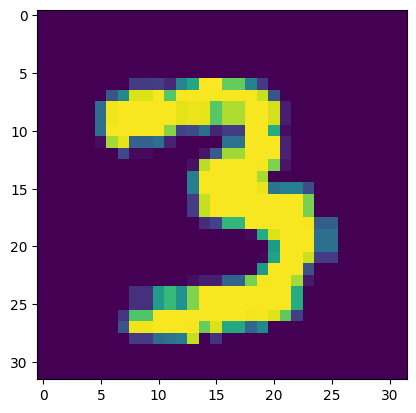

In [ ]:
show(tmp.squeeze(0))

In [ ]:
list1 = [tmp for x in range(32)]
tmp2 = torch.cat(list1)
tmp2.shape

torch.Size([32, 1, 32, 32])

In [ ]:
# tmp2 = F.normalize(tmp2,)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        ...,


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
         

In [ ]:
# model(tmp2.to(device))

RuntimeError: ignored

# data_transform 사용

In [ ]:
data_transform = transforms.Compose(

    [
    transforms.ToTensor(),
    transforms.Resize(32),
    transforms.Normalize((0.5,),(1.0,))

    ]
)

In [ ]:
test_data.data[500].size()
tmp = test_data.data[500]
tmp.shape

torch.Size([28, 28])

In [ ]:
tmp = data_transform(tmp.numpy())
tmp.size()
# tmp = tmp.unsqueeze(0)
# tmp = tmp.unsqueeze(0)
# tmp.shape

torch.Size([1, 32, 32])

In [ ]:
import numpy as np
# tmp = np.transpose(tmp,(1,2,0))
# tmp = tmp.unsqueeze(0)
tmp.shape

torch.Size([1, 32, 32])

In [ ]:
type(tmp)

torch.Tensor

In [ ]:
data_transform = transforms.Compose(

    [
    transforms.ToTensor(),
    transforms.Resize(32),
    transforms.Normalize((0.5,),(1.0,))

    ]
)
# tmp = data_transform(tmp.numpy())
tmp_loader = DataLoader(tmp,batch_size=1,shuffle=True)
tmp_loader

In [ ]:
data = next(iter(tmp_loader))
data

tensor([[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         ...,
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]])

In [ ]:
data.size()

torch.Size([1, 32, 32])

In [ ]:
# 검증 모드
model.eval()

with torch.no_grad():

  for images in tmp_loader:
    print("images shape : ",images.size())
    images = images.to(device)

    preds = model(images)

    print("preds : ",preds)
    # _ : 큰값
    # pred : 인덱스
    _,pred = torch.max(preds.data,1)

    print("preds.data : ",preds.data)
    print("pred : ",pred)

images shape :  torch.Size([1, 32, 32])
preds :  tensor([[-1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000]])
preds.data :  tensor([[-1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000]])
pred :  tensor([3])


In [ ]:
test_data.targets[500]

tensor(3)

# 임의의 사진

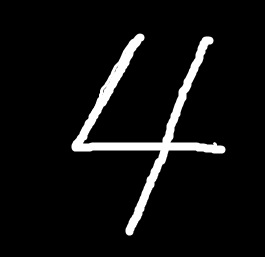

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_number4/pytorch_num4.jpg'

img = cv2.imread(path)
cv2_imshow(img)

In [ ]:
from PIL import Image

img = Image.open(path)
img = np.array(img)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
img.shape

(257, 265, 3)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(257, 265)

In [ ]:
img_gray = cv2.resize(img_gray,(28,28))
img_gray.shape

(28, 28)

In [ ]:
tmp = data_transform(img_gray)
tmp.size()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 32, 32])

In [ ]:
tmp_loader = DataLoader(tmp,batch_size=1,shuffle=True)
tmp_loader

In [ ]:
# 검증 모드
model.eval()

with torch.no_grad():

  for images in tmp_loader:
    print("images shape : ",images.size())
    images = images.to(device)

    preds = model(images)

    print("preds : ",preds)
    # _ : 큰값
    # pred : 인덱스
    _,pred = torch.max(preds.data,1)

    print("preds.data : ",preds.data)
    print("pred : ",pred)

images shape :  torch.Size([1, 32, 32])
preds :  tensor([[-1.0000, -0.9997, -1.0000, -1.0000,  1.0000, -1.0000, -0.9999, -0.7158,
         -1.0000, -1.0000]])
preds.data :  tensor([[-1.0000, -0.9997, -1.0000, -1.0000,  1.0000, -1.0000, -0.9999, -0.7158,
         -1.0000, -1.0000]])
pred :  tensor([4])
